In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Reading the dataset and we show the first 5 rows of our training data using head method

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Explotary data Analysis,we check missing values in train file
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Check missing values in test file
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Text(0.5, 1.0, 'Survival Count')

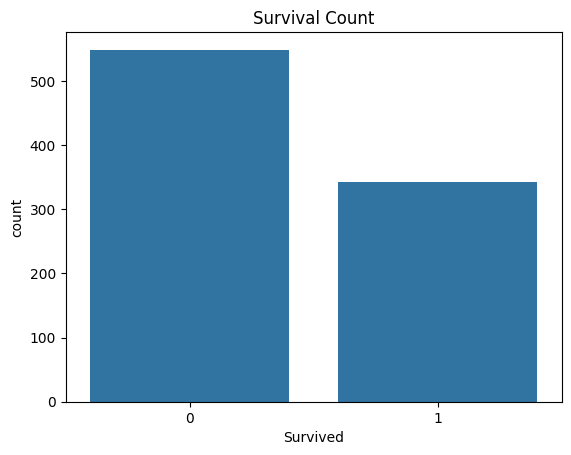

In [7]:
sns.countplot(data=train, x='Survived')
plt.title("Survival Count")


Text(0.5, 1.0, 'Survival Count based on Gender')

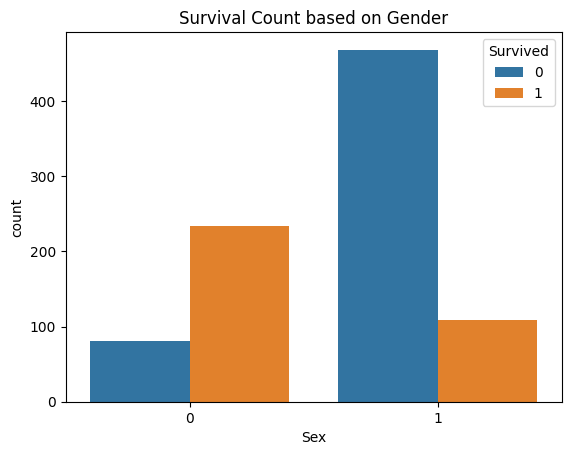

In [25]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title("Survival Count based on Gender")


Text(0.5, 1.0, 'Survival Count based on Ticket Class')

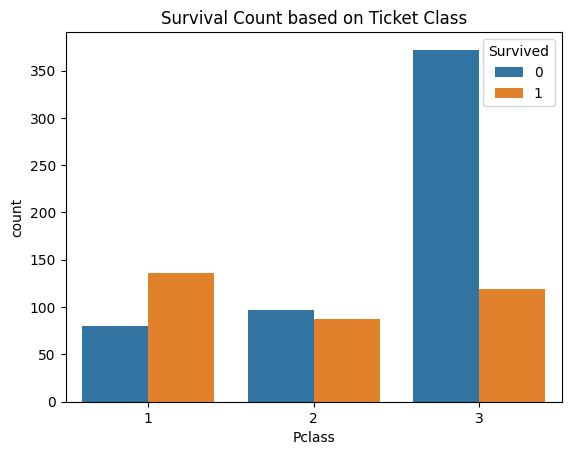

In [26]:
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title("Survival Count based on Ticket Class")


Text(0.5, 1.0, 'The Age Distribution')

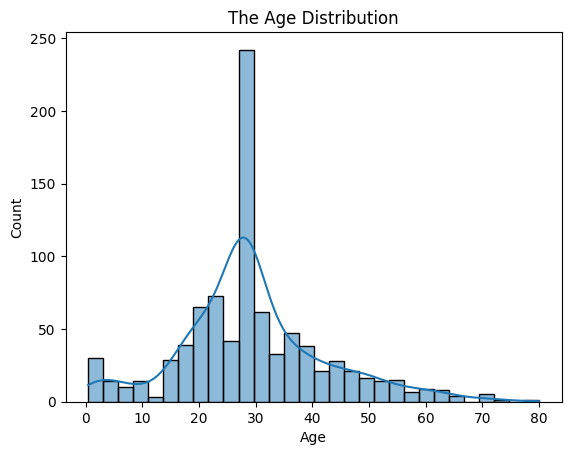

In [27]:
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title("The Age Distribution")

In [11]:
print(train['Survived'].value_counts(normalize=True))


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [ ]:
# step 4 data processing
# Filling missing values in the dataset.
# From our check, we saw that some columns Age,Embarked and Fare have missing data.
# We wiill fill them using the median then the dataset isready for analysis.

train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)


/tmp/ipykernel_5166/3175250433.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
/tmp/ipykernel_5166/3175250433.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
# Now that we have filled the missing values, we need to encode the dataset.
# This means converting all text values into numerical values so the model can understand them.


# Save PassengerId for final submission
test_passenger_ids = test['PassengerId']

# Drop irrelevant columns
train.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
test.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)



In [ ]:
#importing labelencoder
from sklearn.preprocessing import LabelEncoder


labelencoder = LabelEncoder()
train['Sex'] = labelencoder.fit_transform(train['Sex'])  # output will be after encoding male=0 female=1
test['Sex'] = labelencoder.transform(test['Sex'])


In [ ]:
# For Embarked, we use pd.get_dummies() because it has more than two categories: S,C and Q.

train = pd.get_dummies(train, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Embarked'])

In [ ]:
# Make sure train and test have the same columns by aligning them, missing columns in test will be filled with 0.

train, test = train.align(test, join='left', axis=1, fill_value=0)


In [ ]:
#Model creation

from sklearn.model_selection import train_test_split
X = train.drop('Survived', axis=1)
y = train['Survived']               
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
#prediction, we give the test value
y_pred = model.predict(X_test)


In [ ]:
# Print the accuracy of the model.
# print the confusion matrix to see how predictions is distributed.
# Show the classification report with precision, recall, and F1-score.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
#Test with another model and printing accuracy
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_rf_pred))

Random Forest Accuracy: 0.8044692737430168


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions from our model
y_pred = model.predict(X_test)

# the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# the confusion matrix to see the correct vs incorrect predictions
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Printing precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
from sklearn.ensemble import RandomForestClassifier
# create a Random Forest model with a fixed random state for consistent results
randomforest_model = RandomForestClassifier(n_estimators=100, random_state=42)

randomforest_model.fit(X_train, y_train)
y_rf_pred = randomforest_model.predict(X_test)

# Evaluation of the performance of model
print("Random Forest Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_rf_pred))
print("Classification Report:\n", classification_report(y_test, y_rf_pred))


Random Forest Accuracy: 0.8044692737430168
Confusion Matrix:
 [[88 17]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

